# Importing Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [39]:
data = pd.read_csv("customer_dataset.csv")
data.head()

,Customer_ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [40]:
data.drop(columns="Customer_ID", axis=1, inplace=True)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [41]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Removing spaces and null values from Total Charges

In [42]:
pd.to_numeric(data.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [43]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [44]:
data.shape

(7043, 20)

In [45]:
new_data= data[data.TotalCharges!=' ']
new_data.shape

(7032, 20)

In [46]:
new_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [47]:
new_data.TotalCharges= pd.to_numeric(new_data.TotalCharges)

C:\Users\sabhy\AppData\Local\Temp\ipykernel_5484\3050112935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.TotalCharges= pd.to_numeric(new_data.TotalCharges)


In [48]:
new_data.TotalCharges.dtypes

dtype('float64')

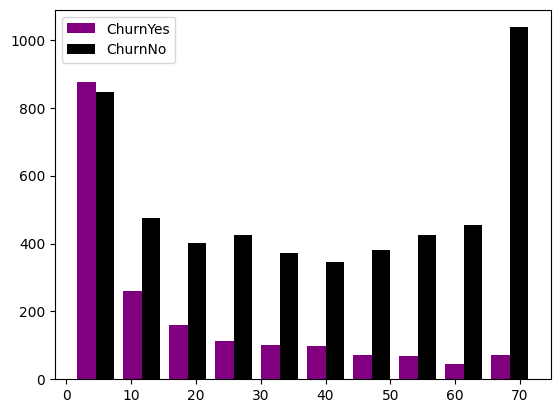

In [49]:
tenure_churn_no=new_data[new_data.Churn == 'No'].tenure
tenure_churn_yes=new_data[new_data.Churn == 'Yes'].tenure
ply.hist([tenure_churn_yes, tenure_churn_no], color=['purple','black'], label=['ChurnYes', 'ChurnNo'])
ply.legend()

# Label Encoding

In [50]:
def unique_col_values(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column}: {data[column].unique()}')

In [51]:
unique_col_values(new_data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Labelling "No phone service"/"No internet service" as "NO"

In [52]:
new_data.replace('No phone service', 'No', inplace=True)
new_data.replace('No internet service','No',inplace=True)

C:\Users\sabhy\AppData\Local\Temp\ipykernel_5484\1843328930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace('No phone service', 'No', inplace=True)
C:\Users\sabhy\AppData\Local\Temp\ipykernel_5484\1843328930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace('No internet service','No',inplace=True)


In [53]:
unique_col_values(new_data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Labelling "Yes"=1 and "No"=0

In [54]:
yes_no_columns= ['Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    new_data.replace({'Yes': 1, 'No':0},inplace=True)

C:\Users\sabhy\AppData\Local\Temp\ipykernel_5484\1374225177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace({'Yes': 1, 'No':0},inplace=True)


In [55]:
for col in new_data:
    print(f'{col}: {new_data[col].unique}')

gender: <bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7032, dtype: object>
SeniorCitizen: <bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64>
Partner: <bound method Series.unique of 0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7032, dtype: int64>
Dependents: <bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7032, dtype: int64>
tenure: <bound method Series.unique of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042   

Labelling Male as 0 and Female as 1

In [56]:
new_data['gender'].replace({'Female':1, 'Male':0},inplace=True)

C:\Users\sabhy\AppData\Local\Temp\ipykernel_5484\305964013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['gender'].replace({'Female':1, 'Male':0},inplace=True)


In [57]:
new_data['gender'].unique()

array([1, 0], dtype=int64)

In [58]:
new_data2=pd.get_dummies(data=new_data, columns=['InternetService','Contract','PaymentMethod'])
new_data2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [59]:
new_data2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3492,1,0,0,0,3,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
5260,1,0,0,0,33,1,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
5932,0,0,1,0,5,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
5630,1,0,0,0,39,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
758,1,0,0,1,15,1,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0


In [60]:
new_data2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

Scailing the data(columns: tenure, MonthlyCharges , TotalCharges)

In [61]:
col_to_scale= ['tenure', 'MonthlyCharges' , 'TotalCharges']
 
scaler= MinMaxScaler()
new_data2[col_to_scale] = scaler.fit_transform(new_data2[col_to_scale])

scaled columns are now in the range from 0-1

In [62]:
for col in new_data2:
    print(f'{col}: {new_data2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Splitting the dataset into train data and test data

In [63]:
x= new_data2.drop('Churn', axis='columns')
y= new_data2['Churn']

In [64]:
x_train, x_test, y_train, y_test= train_test_split(x ,y, test_size=0.2, random_state=5)

In [65]:
print("Size of Training Data: ", x_train.shape) 
print("Size of testing data: ", x_test.shape)

Size of Training Data:  (5625, 26)
Size of testing data:  (1407, 26)


In [66]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile( optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5171 - accuracy: 0.7524
Epoch 2/100
176/176 [==============================] - 0s 962us/step - loss: 0.4312 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8012
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4152 - accuracy: 0.8060
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8060
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8073
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8098
Epoch 8/100
176/176 [==============================] - 0s 975us/step - loss: 0.4095 - accuracy: 0.8112
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8112
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4087 - ac

# Data Evaluation

In [67]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7704


[0.46310850977897644, 0.7704335451126099]

In [68]:
y_pred= model.predict(x_test)
y_pred[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.39146632],
       [0.40339866],
       [0.00447762],
       [0.7013114 ],
       [0.30414706]], dtype=float32)

In [72]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

Converting the values of y_pred to 0 or 1

In [70]:
y_prediction =[]
for element in y_pred:
    if element > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [73]:
y_prediction[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [77]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       999
           1       0.66      0.43      0.52       408

    accuracy                           0.77      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.76      0.77      0.75      1407



# Confusion Matrix

Text(33.22222222222222, 0.5, 'Truth')

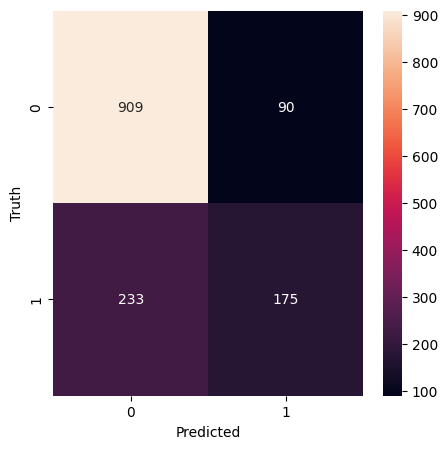

In [80]:
conf_matrix= tf.math.confusion_matrix(labels= y_test, predictions= y_prediction)

ply.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot= True, fmt='d')
ply.xlabel('Predicted')
ply.ylabel('Truth')